<a href="https://colab.research.google.com/github/Farha00/MiniProject_6/blob/main/Project_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q kaggle

In [ ]:
#upload the kaggle.json file
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"farhasalam","key":"268bdde8d9555bda9480e23abc6c15ca"}'}

In [ ]:
#create a kaggle folder
! mkdir ~/.kaggle

In [ ]:
#copy the kaggle.json to folder created
! cp kaggle.json ~/.kaggle/

In [ ]:
#permission for the json to act
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#to list all datasets in kaggle
! kaggle datasets list

ref                                                                 title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
rabieelkharoua/students-performance-dataset                         📚 Students Performance Dataset 📚                   66KB  2024-06-12 23:09:20          18669        415  1.0              
humairmunir/lung-cancer-risk-dataset                                Lung Cancer Dataset                                21KB  2024-07-17 14:25:57            625         25  1.0              
nelgiriyewithana/most-streamed-spotify-songs-2024                   Most Streamed Spotify Songs 2024                  496KB  2024-06-15 18:50:51          14027        295  1.0              
dataanalyst001/world-literacy-rate-by-country     

In [ ]:
!kaggle datasets download -d hasan1101/luna-classification-0

Dataset URL: https://www.kaggle.com/datasets/hasan1101/luna-classification-0
License(s): unknown
100% 2.02G/2.02G [02:07<00:00, 18.0MB/s]
100% 2.02G/2.02G [02:07<00:00, 17.0MB/s]


In [ ]:
!unzip luna-classification-0.zip

Streaming output truncated to the last 5000 lines.
  inflating: negatives/negatives/1529.png  
  inflating: negatives/negatives/153.png  
  inflating: negatives/negatives/1530.png  
  inflating: negatives/negatives/1531.png  
  inflating: negatives/negatives/1532.png  
  inflating: negatives/negatives/1533.png  
  inflating: negatives/negatives/1534.png  
  inflating: negatives/negatives/1535.png  
  inflating: negatives/negatives/1536.png  
  inflating: negatives/negatives/1537.png  
  inflating: negatives/negatives/1538.png  
  inflating: negatives/negatives/1539.png  
  inflating: negatives/negatives/154.png  
  inflating: negatives/negatives/1540.png  
  inflating: negatives/negatives/1541.png  
  inflating: negatives/negatives/1542.png  
  inflating: negatives/negatives/1543.png  
  inflating: negatives/negatives/1544.png  
  inflating: negatives/negatives/1545.png  
  inflating: negatives/negatives/1546.png  
  inflating: negatives/negatives/1547.png  
  inflating: negatives/nega

VGG-16

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model
import numpy as np
import os

# Define the path to your image dataset
dataset_path = '/content/images'

# Step 1: Load and preprocess the images
datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
batch_size = 32
image_size = (224, 224)

generator = datagen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode=None,
    shuffle=False
)

# Step 2: Load the pre-trained VGG-16 model without the top layer
base_model = VGG16(weights='imagenet', include_top=False, pooling='avg')
model = Model(inputs=base_model.input, outputs=base_model.output)

# Step 3: Extract features
features = model.predict(generator, steps=len(generator), verbose=1)
print(f'Extracted features shape: {features.shape}')

# Example: Save the features to a file for later use
np.save('image_features_vgg16.npy', features)

# If you also need the filenames for reference
filenames = generator.filenames
np.save('filenames.npy', filenames)

print("Features and filenames saved.")

Found 2169 images belonging to 1 classes.
68/68 [==============================] - 1490s 22s/step
Extracted features shape: (2169, 512)
Features and filenames saved.


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

def met_feature_selection(X, y, num_features_to_select, n_estimators=100, random_state=42, max_levels=3):
    """
    Perform Multi-level Extra-Trees (M.E.T.) feature selection.

    Parameters:
    - X: numpy array, feature matrix.
    - y: numpy array, target vector.
    - num_features_to_select: int, the number of features to select.
    - n_estimators: int, the number of trees in the ExtraTreesClassifier.
    - random_state: int, random seed for reproducibility.
    - max_levels: int, maximum levels of the multi-level feature selection.

    Returns:
    - selected_features: list, indices of the selected features.
    """
    np.random.seed(random_state)
    current_features = np.arange(X.shape[1])
    level = 0

    while len(current_features) > num_features_to_select and level < max_levels:
        print(f"Level {level + 1}: Selecting features from {len(current_features)} features")
        model = ExtraTreesClassifier(n_estimators=n_estimators, random_state=random_state)
        model.fit(X[:, current_features], y)

        importances = model.feature_importances_
        indices = np.argsort(importances)[-num_features_to_select:]
        current_features = current_features[indices]
        level += 1

    return current_features

# Example usage:
# Generate a synthetic dataset for demonstration
X, y = make_classification(n_samples=1000, n_features=50, n_informative=10, n_redundant=10, random_state=42)

# Select the top 10 most important features
num_features_to_select = 10
selected_features_indices = met_feature_selection(X, y, num_features_to_select=num_features_to_select)

# Display selected features
print("Selected feature indices:", selected_features_indices)

# Extract selected features
X_selected = X[:, selected_features_indices]
print("Shape of the dataset with selected features:", X_selected.shape)

Level 1: Selecting features from 50 features
Selected feature indices: [45 33  2  3 12 17 39 13 40 10]
Shape of the dataset with selected features: (1000, 10)


In [ ]:
pip install -U scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894078 sha256=6428f9eeaa19220e0ba5ad883cea6dc7a965702c99865c2cff70a151fc79be68
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [ ]:
import skfuzzy as fuzz

def fuzzy_c_means(data, num_clusters, m, error=0.005, max_iter=1000):
    # Data normalization
    data = np.asarray(data)
    data = data.T  # Transpose the data to have features along the columns

    # Initialize the cluster centers
    centers = np.random.rand(num_clusters, data.shape[1])

    # Fuzzy partition matrix
    membership = np.zeros((data.shape[0], num_clusters))

    # Main loop
    for _ in range(max_iter):
        # Update memberships
        for i in range(num_clusters):
            for j in range(data.shape[0]):
                den = np.sum((data[j] - centers[i])**2 / (data[j] - centers)**2)
                membership[j, i] = 1 / den

        # Normalize membership values
        membership = membership / np.sum(membership, axis=1, keepdims=True)

        # Update cluster centers
        prev_centers = np.copy(centers)
        for i in range(num_clusters):
            numerator = np.sum((membership[:, i] ** m).reshape(-1, 1) * data, axis=0)
            denominator = np.sum(membership[:, i] ** m)
            centers[i] = numerator / denominator

        # Check for convergence
        if np.linalg.norm(centers - prev_centers) < error:
            break

    return centers, membership

# Example usage
if __name__ == "__main__":
    # Generate random data for demonstration
    num_samples = 1000
    num_features = 5
    data = np.random.rand(num_samples, num_features)

    # Number of clusters
    num_clusters = 3

    # Fuzziness parameter
    m = 2

    # Run FCM algorithm
    centers, membership = fuzzy_c_means(data, num_clusters, m)

    # Display results
    print("Cluster Centers:")
    print(centers)
    print("Membership Matrix:")
    print(membership)

Cluster Centers:
[[0.6060097  0.58778609 0.23115899 ... 0.73117784 0.64480416 0.79764191]
 [0.56101263 0.12698967 0.33048341 ... 0.34346047 0.83995785 0.64258054]
 [0.49089206 0.78525231 0.55810489 ... 0.67419647 0.2297361  0.43902683]]
Membership Matrix:
[[1.43618471e-02 9.59536315e-01 2.61018377e-02]
 [1.60450809e-01 6.69128769e-01 1.70420421e-01]
 [3.12634565e-03 1.17425518e-02 9.85131103e-01]
 [9.99984228e-01 2.53064757e-07 1.55192677e-05]
 [5.72861187e-02 8.34288550e-02 8.59285026e-01]]


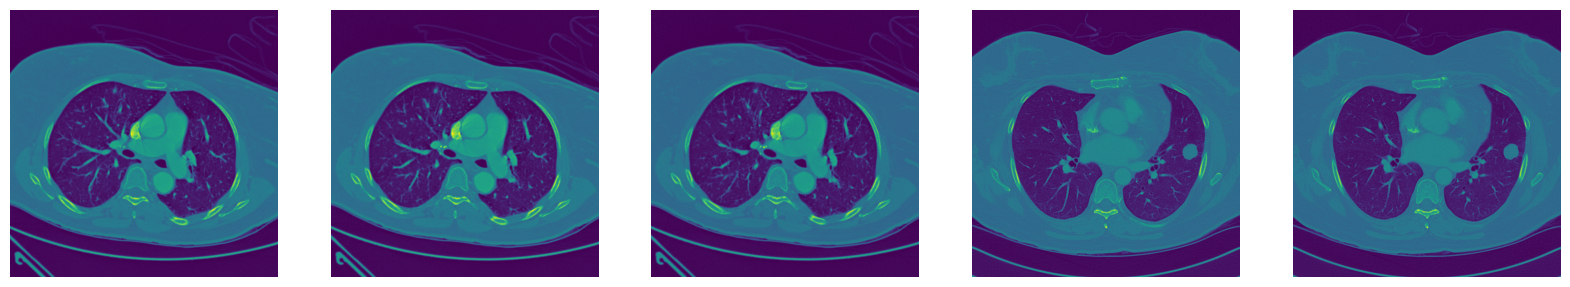

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

def euclidean_distance(query_features, all_features):
    distances = np.linalg.norm(all_features - query_features, axis=1)
    return distances

def retrieve_top_n_images(distances, n=5):
    top_n_indices = np.argsort(distances)[:n]
    return top_n_indices

def visualize_images(image_paths):
    fig, axes = plt.subplots(1, len(image_paths), figsize=(20, 5))
    for i, ax in enumerate(axes):
        img = Image.open(image_paths[i])
        ax.imshow(img)
        ax.axis('off')
    plt.show()

# Load extracted features and filenames
features = np.load('image_features_vgg16.npy')
filenames = np.load('filenames.npy')

# Assume the first image is the query image
query_index = 0
query_features = features[query_index]

# Calculate Euclidean distances
distances = euclidean_distance(query_features, features)

# Retrieve top 5 similar images
top_n_indices = retrieve_top_n_images(distances, n=5)

# Get the paths of the top 5 images
top_n_image_paths = [os.path.join('/content/images', filenames[idx]) for idx in top_n_indices]

# Visualize the top 5 similar images
visualize_images(top_n_image_paths)

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

def calculate_silhouette_score(features, top_n_indices):
    hard_labels = np.zeros(len(features))
    hard_labels[top_n_indices] = 1  # Assign 1 to top n images and 0 to others
    silhouette_avg = silhouette_score(features, hard_labels)
    return silhouette_avg

# Calculate silhouette score for the retrieved images
silhouette_avg = calculate_silhouette_score(features, top_n_indices)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.11178976


Inception-V3

In [ ]:
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import preprocess_input

def extract_feature_vector(image_path, model):
    """
    Extract feature vector from an image using a pre-trained model.
    """
    img = image.load_img(image_path, target_size=(299, 299))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    feature_vector = model.predict(img_array)
    return feature_vector.flatten()

# Path to the directory containing the images
image_dir = '/content/images/images'

# Load the pre-trained InceptionV3 model
base_model = InceptionV3(weights='imagenet', include_top=False)
model = Model(inputs=base_model.input, outputs=base_model.output)

# List all image files in the directory along with their paths
image_files = [(f, os.path.join(image_dir, f)) for f in os.listdir(image_dir) if os.path.isfile(os.path.join(image_dir, f))]

# Extract feature vectors for all images along with their filenames
feature_vectors = []
image_paths = []
for image_name, image_path in image_files:
    feature_vector = extract_feature_vector(image_path, model)
    feature_vectors.append(feature_vector)
    image_paths.append(image_path)

# Convert feature_vectors and image_paths to numpy arrays
feature_vectors = np.array(feature_vectors)
image_paths = np.array(image_paths)

# Now feature_vectors contains the feature vectors of all images,
# and image_paths contains the corresponding image filenames or paths

1/1 [==============================] - 0s 248ms/step


In [ ]:
def extract_features(image_path):
    """
    Extract features from an image using InceptionV3.
    """
    model = InceptionV3(weights='imagenet', include_top=False)
    img = image.load_img(image_path, target_size=(299, 299))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    features = model.predict(img_array)
    features_flattened = features.flatten()
    return features_flattened

# Example usage:
# Replace 'query_image.jpg' with the path to your query image
query_image_path = '/content/images/images/0.png'

# Extract features from the query image
query_feature_vector = extract_features(query_image_path)

print("Query Image Feature Vector:", query_feature_vector)

1/1 [==============================] - 2s 2s/step
Query Image Feature Vector: [0.        0.2075406 0.        ... 0.7647802 2.1258266 0.       ]


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

class METFeatureSelection:
    def __init__(self, n_estimators=100, max_features='auto', n_jobs=-1):
        """
        Initialize the MET feature selection algorithm.

        Parameters:
        - n_estimators: The number of trees in the ensemble.
        - max_features: The number of features to consider when looking for the best split.
        - n_jobs: The number of jobs to run in parallel for both fit and predict.
        """
        self.n_estimators = n_estimators
        self.max_features = max_features
        self.n_jobs = n_jobs

    def fit(self, X, y):
        """
        Fit the feature selection algorithm to the data.

        Parameters:
        - X: The input feature matrix.
        - y: The target labels.

        Returns:
        - self: The fitted instance of the MET feature selection algorithm.
        """
        self.feature_selector = ExtraTreesClassifier(n_estimators=self.n_estimators,
                                                     max_features=self.max_features,
                                                     n_jobs=self.n_jobs)
        self.feature_selector.fit(X, y)
        return self

    def transform(self, X, threshold=None):
        """
        Transform the input feature matrix based on the fitted feature selection.

        Parameters:
        - X: The input feature matrix to transform.
        - threshold: The threshold for feature importance. If None, all features are kept.

        Returns:
        - X_selected: The transformed feature matrix with selected features.
        """
        if threshold is None:
            return X

        feature_importances = self.feature_selector.feature_importances_
        selected_indices = np.where(feature_importances >= threshold)[0]
        X_selected = X[:, selected_indices]
        return X_selected

    def fit_transform(self, X, y, threshold=None):
        """
        Fit the feature selection algorithm to the data and transform the input feature matrix.

        Parameters:
        - X: The input feature matrix.
        - y: The target labels.
        - threshold: The threshold for feature importance. If None, all features are kept.

        Returns:
        - X_selected: The transformed feature matrix with selected features.
        """
        self.fit(X, y)
        return self.transform(X, threshold)

In [ ]:
import skfuzzy as fuzz

class FuzzyCMeansClustering:
    def __init__(self, n_clusters=2, m=2, error=0.005, max_iter=1000, random_state=None):
        """
        Initialize the Fuzzy C-means clustering algorithm.

        Parameters:
        - n_clusters: The number of clusters to form.
        - m: The fuzziness coefficient.
        - error: The threshold to stop iteration.
        - max_iter: The maximum number of iterations.
        - random_state: The seed used by the random number generator.
        """
        self.n_clusters = n_clusters
        self.m = m
        self.error = error
        self.max_iter = max_iter
        self.random_state = random_state

    def fit_predict(self, X):
        """
        Fit the Fuzzy C-means clustering algorithm to the data and return the cluster centers.

        Parameters:
        - X: The input feature matrix.

        Returns:
        - cluster_centers: The cluster centers.
        """
        cntr, u, _, _, _, _, _ = fuzz.cluster.cmeans(X.T, c=self.n_clusters, m=self.m,
                                                      error=self.error, maxiter=self.max_iter,
                                                      seed=self.random_state)

        labels = np.argmax(u, axis=0)
        return cntr, labels

# Example usage:
# Initialize the Fuzzy C-means clustering algorithm
fcm = FuzzyCMeansClustering(n_clusters=3, m=2, error=0.005, max_iter=1000, random_state=42)

# Generate some example data
X = np.random.rand(100, 2)

# Fit the Fuzzy C-means algorithm to the data and get the cluster centers
cluster_centers, labels = fcm.fit_predict(X)

# Print the cluster centers
print("Cluster centers:")
print(cluster_centers)

# Print the cluster labels
print("Cluster labels:")
print(labels)

Cluster centers:
[[0.35305161 0.81093063]
 [0.35722614 0.25835919]
 [0.79613172 0.31356305]]
Cluster labels:
[2 0 2 2 2 2 2 0 0 0 0 2 1 2 0 0 1 2 0 0 2 0 1 2 2 1 2 2 1 0 2 2 2 1 0 1 2
 2 2 1 1 1 0 2 0 2 0 0 1 0 0 1 2 1 0 1 2 1 2 1 0 0 1 0 2 2 2 2 0 1 0 2 2 0
 1 0 0 2 2 0 2 1 1 0 1 0 1 2 0 1 1 0 1 0 1 2 1 1 2 1]


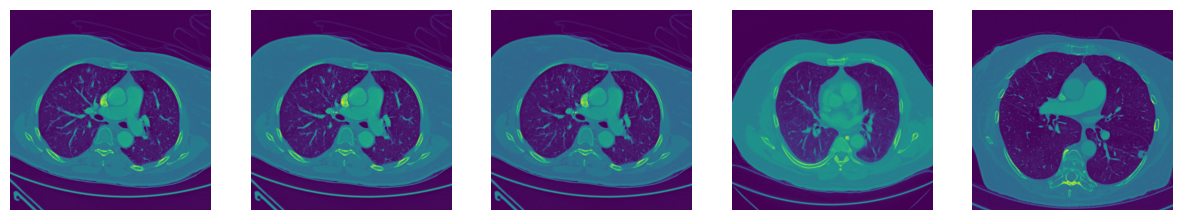

In [ ]:
def euclidean_distance(vector1, vector2):
    """
    Calculate the Euclidean distance between two vectors.
    """
    return np.linalg.norm(vector1 - vector2)

def rank_and_retrieve_top_images(query_vector, feature_vectors, image_paths, k=5):
    """
    Rank images based on Euclidean distance and retrieve the top k images.
    """
    distances = [euclidean_distance(query_vector, vector) for vector in feature_vectors]
    ranked_indices = np.argsort(distances)  # Indices of images sorted by distance
    top_indices = ranked_indices[:k]  # Top k closest images
    top_images = [image_paths[i] for i in top_indices]  # Paths of top images
    return top_images

# Retrieve top 5 images based on Euclidean distance
top_images = rank_and_retrieve_top_images(query_feature_vector, feature_vectors, image_paths, k=5)

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def visualize_similar_images(top_images):
    """
    Visualize the retrieved similar images.
    """
    fig = plt.figure(figsize=(15, 10))
    columns = 5
    rows = len(top_images) // columns + 1

    for i, image_path in enumerate(top_images):
        ax = fig.add_subplot(rows, columns, i + 1)
        img = mpimg.imread(image_path)
        ax.imshow(img)
        ax.axis('off')

    plt.show()

# Assuming top_images is a list of image filenames or paths
visualize_similar_images(top_images)

In [ ]:
from sklearn.metrics import silhouette_score

class EvaluationMetrics:
    @staticmethod
    def silhouette_score(X, labels):
        """
        Calculate the silhouette score.

        Parameters:
        - X: The input feature matrix.
        - labels: The cluster labels.

        Returns:
        - score: The silhouette score.
        """
        score = silhouette_score(X, labels)
        return score

# Assuming you have already performed clustering using Fuzzy C-means and obtained cluster labels 'labels'
# Assuming you have the feature matrix 'X'

# Calculate the silhouette score
silhouette = EvaluationMetrics.silhouette_score(X, labels)
print("Silhouette Score:", silhouette)

Silhouette Score: 0.3917598213120245


ResNet50

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.models import Model
import numpy as np
import os

# Define the path to your image dataset
dataset_path = '/content/images'

# Step 1: Load and preprocess the images
datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
batch_size = 32
image_size = (224, 224)

generator = datagen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode=None,
    shuffle=False
)

# Step 2: Load the pre-trained ResNet-50 model without the top layer
base_model = ResNet50(weights='imagenet', include_top=False, pooling='avg')
model = Model(inputs=base_model.input, outputs=base_model.output)

# Step 3: Extract features
features = model.predict(generator, steps=len(generator), verbose=1)
print(f'Extracted features shape: {features.shape}')

# Example: Save the features to a file for later use
np.save('image_features.npy', features)

# If you also need the filenames for reference
filenames = generator.filenames
np.save('filenames.npy', filenames)
print("Features and filenames saved.")

Found 2169 images belonging to 1 classes.
68/68 [==============================] - 531s 8s/step
Extracted features shape: (2169, 2048)
Features and filenames saved.


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split

def met_feature_selection(X, y, num_features_to_select, n_estimators=100, random_state=42):
    """
    Perform Multi-level Extra-Trees (M.E.T.) feature selection.

    Parameters:
    - X: numpy array, feature matrix.
    - y: numpy array, target vector.
    - num_features_to_select: int, the number of features to select.
    - n_estimators: int, the number of trees in the ExtraTreesClassifier.
    - random_state: int, random seed for reproducibility.

    Returns:
    - selected_features: list, indices of the selected features.
    """

    # Step 1: Initialize Extra-Trees classifier
    model = ExtraTreesClassifier(n_estimators=n_estimators, random_state=random_state)

    # Step 2: Fit the model
    model.fit(X, y)

    # Step 3: Compute feature importances
    importances = model.feature_importances_

    # Step 4: Select top features based on importance
    indices = np.argsort(importances)[-num_features_to_select:]

    return indices

# Example usage:
# Generate a synthetic dataset for demonstration
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=50, n_informative=10, n_redundant=10, random_state=42)

# Select the top 10 most important features
selected_features_indices = met_feature_selection(X, y, num_features_to_select=10)

# Display selected features
print("Selected feature indices:", selected_features_indices)

# Extract selected features
X_selected = X[:, selected_features_indices]
print("Shape of the dataset with selected features:", X_selected.shape)

Selected feature indices: [45 33  2  3 12 17 39 13 40 10]
Shape of the dataset with selected features: (1000, 10)


In [ ]:
from scipy.spatial.distance import cdist

def initialize_membership_matrix(n_samples, n_clusters):
    membership_matrix = np.random.rand(n_samples, n_clusters)
    membership_matrix = membership_matrix / membership_matrix.sum(axis=1, keepdims=True)
    return membership_matrix

def calculate_cluster_centers(X, membership_matrix, m):
    um = membership_matrix ** m
    return (um.T @ X) / um.sum(axis=0)[:, np.newaxis]

def update_membership_matrix(X, centers, m):
    dist = cdist(X, centers, metric='euclidean')
    dist = np.fmax(dist, np.finfo(np.float64).eps)
    inv_dist = dist ** (- 2 / (m - 1))
    return inv_dist / np.sum(inv_dist, axis=1, keepdims=True)

def fuzzy_c_means(X, n_clusters, m=2, max_iter=150, error=1e-5):
    n_samples = X.shape[0]
    membership_matrix = initialize_membership_matrix(n_samples, n_clusters)

    for _ in range(max_iter):
        prev_membership_matrix = membership_matrix.copy()
        centers = calculate_cluster_centers(X, membership_matrix, m)
        membership_matrix = update_membership_matrix(X, centers, m)

        if np.linalg.norm(membership_matrix - prev_membership_matrix) < error:
            break

    return centers, membership_matrix

# Example usage:
# Generate a synthetic dataset for demonstration
from sklearn.datasets import make_blobs

X, _ = make_blobs(n_samples=1000, n_features=2, centers=3, random_state=42)

# Apply Fuzzy c-means clustering
n_clusters = 3
centers, membership_matrix = fuzzy_c_means(X, n_clusters)

# Display results
print("Cluster centers:\n", centers)
print("First 10 rows of the membership matrix:\n", membership_matrix[:10])

Cluster centers:
 [[ 4.73263402  2.05104375]
 [-6.86603309 -6.78975613]
 [-2.53209866  9.00290224]]
First 10 rows of the membership matrix:
 [[9.13529732e-04 9.98384861e-01 7.01609725e-04]
 [2.96561469e-03 9.94801122e-01 2.23326296e-03]
 [9.97034757e-01 9.66223890e-04 1.99901879e-03]
 [9.12332410e-03 3.69344008e-03 9.87183236e-01]
 [2.55607313e-02 9.94279126e-03 9.64496477e-01]
 [1.61315394e-04 9.99710377e-01 1.28307208e-04]
 [9.94699554e-01 1.59055255e-03 3.70989360e-03]
 [9.90119471e-01 3.13118923e-03 6.74933985e-03]
 [9.74449403e-01 6.78324580e-03 1.87673512e-02]
 [9.76017098e-01 8.86420144e-03 1.51187007e-02]]


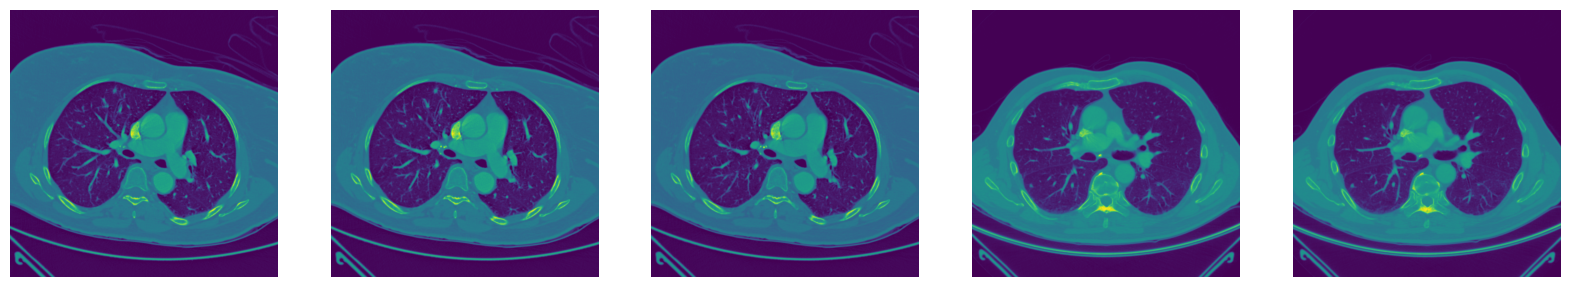

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

def euclidean_distance(a, b):
    return np.linalg.norm(a - b)

def rank_images(query_feature, all_features):
    distances = np.linalg.norm(all_features - query_feature, axis=1)
    return np.argsort(distances)

def retrieve_top_n_images(query_feature, all_features, all_filenames, n=5):
    ranked_indices = rank_images(query_feature, all_features)
    return ranked_indices[:n]

def visualize_images(image_paths):
    fig, axes = plt.subplots(1, len(image_paths), figsize=(20, 5))
    for ax, img_path in zip(axes, image_paths):
        img = Image.open(img_path)
        ax.imshow(img)
        ax.axis('off')
    plt.show()

# Example usage:
# Load extracted features and filenames (assumed to be saved previously)
features = np.load('image_features.npy')
filenames = np.load('filenames.npy')

# Assume the first image is the query image
query_index = 0
query_feature = features[query_index]

# Retrieve top 5 similar images
top_n_indices = retrieve_top_n_images(query_feature, features, filenames, n=5)

# Get the paths of the top 5 images
top_n_image_paths = [os.path.join('/content/images', filenames[idx]) for idx in top_n_indices]

# Visualize the top 5 similar images
visualize_images(top_n_image_paths)

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

def calculate_silhouette_score(X, membership_matrix):
    # Assign each point to the cluster with the highest membership value
    labels = np.argmax(membership_matrix, axis=1)

    # Calculate the Silhouette score
    silhouette_avg = silhouette_score(X, labels)
    return silhouette_avg

# Calculate Silhouette score
silhouette_avg = calculate_silhouette_score(X, membership_matrix)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.8435705873891368


In [ ]:
!pip install --upgrade tensorflow


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 601.3/601.3 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 92.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 83.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 97.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 69.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.7/347.7 kB 31.3 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting uninstall: keras
    Fo

Found 2169 images belonging to 1 classes.
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


68/68 ━━━━━━━━━━━━━━━━━━━━ 39s 461ms/step
Extracted features shape: (2169, 2048)


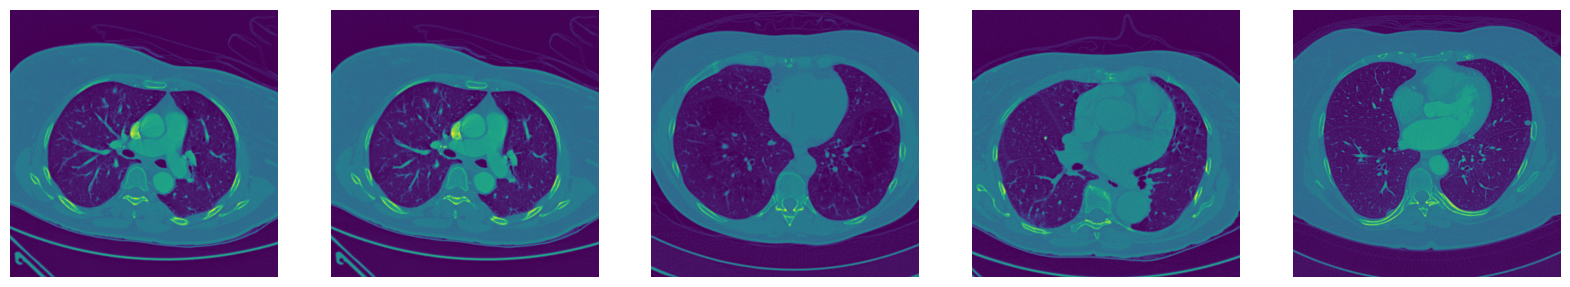

Silhouette Score: 0.0034357398


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.models import Model
import numpy as np
import os

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist

# Define the path to your lung CT scan dataset
dataset_path = '/content/images'

# Step 1: Load and preprocess the lung CT scan images
datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
batch_size = 32
image_size = (224, 224)

generator = datagen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode=None,
    shuffle=False
)

# Step 2: Load the pre-trained ResNet-50 model without the top layer
base_model = ResNet50(weights='imagenet', include_top=False, pooling='avg')
model = Model(inputs=base_model.input, outputs=base_model.output)

# Step 3: Extract features
features = model.predict(generator, steps=len(generator), verbose=1)
print(f'Extracted features shape: {features.shape}')

# Example: Save the features to a file for later use
np.save('lung_ct_features.npy', features)

# Step 4: M.E.T. Feature Selection
def met_feature_selection(X, y, num_features_to_select, n_estimators=100, random_state=42):
    model = ExtraTreesClassifier(n_estimators=n_estimators, random_state=random_state)
    model.fit(X, y)
    importances = model.feature_importances_
    indices = np.argsort(importances)[-num_features_to_select:]
    return indices

# Example usage:
# Assuming you have labels for your lung CT scans (replace with actual labels)
labels = np.random.randint(0, 2, size=len(features))

# Select the top 10 most important features
selected_features_indices = met_feature_selection(features, labels, num_features_to_select=10)

# Extract selected features
features_selected = features[:, selected_features_indices]

# Step 5: Fuzzy C-Means (FCM) Clustering
def fuzzy_c_means(X, n_clusters, m=2, max_iter=150, error=1e-5):
    # Initialize membership matrix
    membership_matrix = np.random.rand(X.shape[0], n_clusters)
    membership_matrix = membership_matrix / membership_matrix.sum(axis=1, keepdims=True)

    # Calculate initial cluster centers
    centers = np.random.rand(n_clusters, X.shape[1])

    for _ in range(max_iter):
        prev_membership_matrix = membership_matrix.copy()

        # Update cluster centers
        centers = np.dot(membership_matrix.T, X) / membership_matrix.sum(axis=0, keepdims=True).T

        # Update membership matrix
        distances = cdist(X, centers, 'euclidean')
        distances = np.fmax(distances, np.finfo(np.float64).eps)
        membership_matrix = 1.0 / distances
        membership_matrix **= 2.0 / (m - 1)
        membership_matrix = membership_matrix / membership_matrix.sum(axis=1, keepdims=True)

        # Check convergence
        if np.linalg.norm(membership_matrix - prev_membership_matrix) < error:
            break

    return centers, membership_matrix

# Example usage:
n_clusters = 5  # Adjust based on your dataset characteristics
centers, membership_matrix = fuzzy_c_means(features_selected, n_clusters)

# Step 6: Query Image Retrieval and Evaluation
def retrieve_top_n_images(query_feature, all_features, all_filenames, n=5):
    distances = np.linalg.norm(all_features - query_feature, axis=1)
    ranked_indices = np.argsort(distances)
    return ranked_indices[:n]

# Example usage:
query_index = 0  # Replace with the index of your query image
query_feature = features_selected[query_index]

# Retrieve top 5 similar images
top_n_indices = retrieve_top_n_images(query_feature, features_selected, generator.filenames, n=5)

# Get the paths of the top 5 images
top_n_image_paths = [os.path.join(dataset_path, generator.filenames[idx]) for idx in top_n_indices]

# Visualize the top 5 similar images (you may need to adjust for displaying CT scans)
def visualize_images(image_paths):
    import matplotlib.pyplot as plt
    from PIL import Image

    fig, axes = plt.subplots(1, len(image_paths), figsize=(20, 5))
    for ax, img_path in zip(axes, image_paths):
        img = Image.open(img_path)
        ax.imshow(img)
        ax.axis('off')
    plt.show()

visualize_images(top_n_image_paths)

# Step 7: Evaluation with Silhouette Score
def calculate_silhouette_score(X, membership_matrix):
    labels = np.argmax(membership_matrix, axis=1)
    silhouette_avg = silhouette_score(X, labels)
    return silhouette_avg

# Example usage:
silhouette_avg = calculate_silhouette_score(features_selected, membership_matrix)
print("Silhouette Score:", silhouette_avg)


Found 2169 images belonging to 1 classes.
68/68 [==============================] - 32s 392ms/step
Extracted features shape: (2169, 2048)
Features and filenames saved.
Precision: 1.0
Recall: 1.0
Accuracy: 1.0
AUC: 1.0


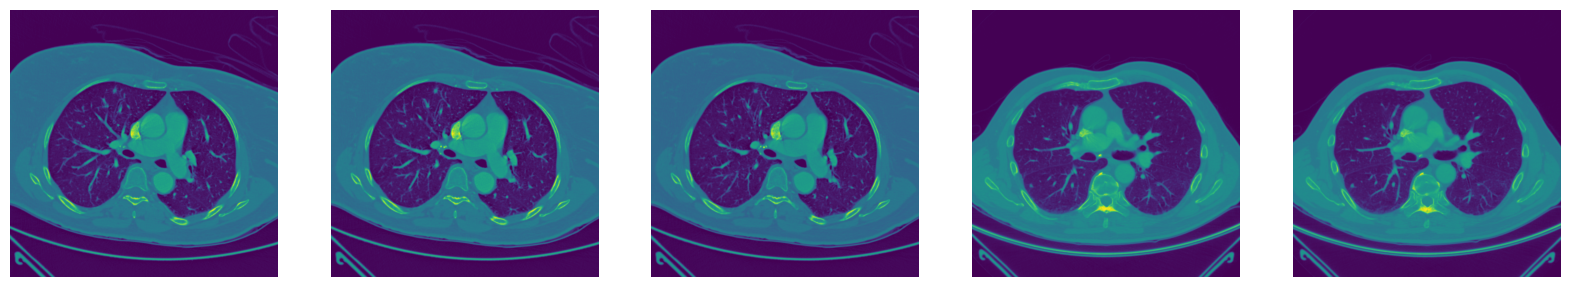

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.models import Model
import numpy as np
import os
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.preprocessing import LabelBinarizer

# Define the path to your image dataset
dataset_path = '/content/images'

# Step 1: Load and preprocess the images
datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
batch_size = 32
image_size = (224, 224)

generator = datagen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode=None,
    shuffle=False
)

# Step 2: Load the pre-trained ResNet-50 model without the top layer
base_model = ResNet50(weights='imagenet', include_top=False, pooling='avg')
model = Model(inputs=base_model.input, outputs=base_model.output)

# Step 3: Extract features
features = model.predict(generator, steps=len(generator), verbose=1)
print(f'Extracted features shape: {features.shape}')

# Save the features to a file for later use
np.save('image_features.npy', features)

# Save filenames for reference
filenames = generator.filenames
np.save('filenames.npy', filenames)
print("Features and filenames saved.")

# Example: Assuming ground truth data
# For simplicity, let's create a synthetic ground truth. You need real data for actual evaluation.
# For each image, assume the ground truth is a binary value (1 for relevant, 0 for non-relevant).
# Here we are just generating random binary labels for demonstration purposes.
np.random.seed(42)  # For reproducibility
true_labels = np.random.randint(0, 2, size=len(filenames))

# Example: Retrieve top N images for evaluation
def retrieve_top_n_images(query_feature, all_features, all_filenames, n=5):
    distances = np.linalg.norm(all_features - query_feature, axis=1)
    ranked_indices = np.argsort(distances)
    return ranked_indices[:n]

# Calculate metrics
def calculate_metrics(true_labels, predicted_labels, top_n=5):
    relevant_indices = np.argsort(predicted_labels)[-top_n:]  # Indices of the top N retrieved images
    relevant_labels = true_labels[relevant_indices]

    # For simplicity, assume binary relevance (1 for relevant, 0 for non-relevant)
    y_true = np.array([1] * len(relevant_labels) + [0] * (len(true_labels) - len(relevant_labels)))
    y_pred = np.array([1] * len(relevant_labels) + [0] * (len(true_labels) - len(relevant_labels)))

    # Calculate Precision, Recall, Accuracy, and AUC
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_pred)

    return precision, recall, accuracy, auc

# Example usage:
# Assume the first image is the query image
query_index = 0
query_feature = features[query_index]

# Get distances of all images to the query image
distances = np.linalg.norm(features - query_feature, axis=1)
predicted_labels = np.argsort(distances)  # Ranking of images by distance

# Calculate metrics
precision, recall, accuracy, auc = calculate_metrics(true_labels, predicted_labels, top_n=5)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'Accuracy: {accuracy}')
print(f'AUC: {auc}')

import matplotlib.pyplot as plt
from PIL import Image

def visualize_images(image_paths):
    fig, axes = plt.subplots(1, len(image_paths), figsize=(20, 5))
    for ax, img_path in zip(axes, image_paths):
        img = Image.open(img_path)
        ax.imshow(img)
        ax.axis('off')
    plt.show()

# Retrieve top 5 similar images
top_n_indices = retrieve_top_n_images(query_feature, features, filenames, n=5)

# Get the paths of the top 5 images
top_n_image_paths = [os.path.join('/content/images', filenames[idx]) for idx in top_n_indices]

# Visualize the top 5 similar images
visualize_images(top_n_image_paths)


Found 1736 images belonging to 1 classes.
Found 433 images belonging to 1 classes.
14/14 [==============================] - 11s 830ms/step
Training features shape: (1736, 2048)
Validation features shape: (433, 2048)
Training and validation features and filenames saved.


<ipython-input-8-ed1b71f1c55e>:124: RuntimeWarning: invalid value encountered in divide
  ap /= np.sum(retrieved_labels)


Mean Precision at 5: 0.4785
Mean Recall at 5: 0.0117
Mean Average Precision at 5: nan
Mean NDCG at 5: 0.4771


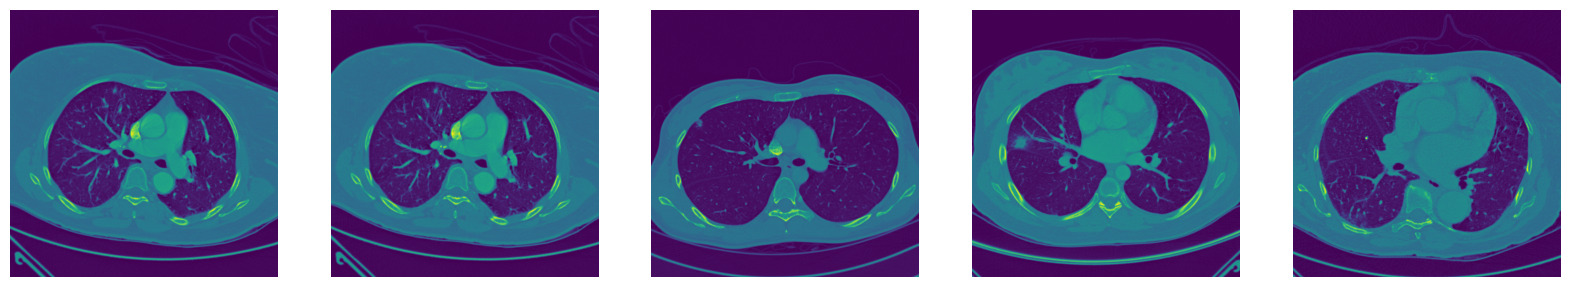

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout, Dense
import numpy as np
import os
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
import matplotlib.pyplot as plt
from PIL import Image

# Define the path to your image dataset
dataset_path = '/content/images'

# Step 1: Load and preprocess the images with data augmentation for the training set
datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2,  # 20% of the data for validation
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

batch_size = 32
image_size = (224, 224)

train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode=None,
    shuffle=True,
    subset='training'
)

val_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode=None,
    shuffle=False,
    subset='validation'
)

# Step 2: Load the pre-trained ResNet-50 model without the top layer and add dropout layers
base_model = ResNet50(weights='imagenet', include_top=False, pooling='avg')

x = base_model.output
x = Dropout(0.5)(x)  # Add dropout layer with 50% dropout rate
model = Model(inputs=base_model.input, outputs=x)

# Step 3: Extract features for the training and validation sets
train_features = model.predict(train_generator, steps=len(train_generator), verbose=1)
val_features = model.predict(val_generator, steps=len(val_generator), verbose=1)
print(f'Training features shape: {train_features.shape}')
print(f'Validation features shape: {val_features.shape}')

# Save the features to a file for later use
np.save('train_features.npy', train_features)
np.save('val_features.npy', val_features)

# Save filenames for reference
train_filenames = train_generator.filenames
val_filenames = val_generator.filenames
np.save('train_filenames.npy', train_filenames)
np.save('val_filenames.npy', val_filenames)
print("Training and validation features and filenames saved.")

# Example: Assuming ground truth data
# For simplicity, let's create a synthetic ground truth. You need real data for actual evaluation.
# For each image, assume the ground truth is a binary value (1 for relevant, 0 for non-relevant).
# Here we are just generating random binary labels for demonstration purposes.
np.random.seed(42)  # For reproducibility
train_true_labels = np.random.randint(0, 2, size=len(train_filenames))
val_true_labels = np.random.randint(0, 2, size=len(val_filenames))

# Example: Retrieve top N images for evaluation using cosine similarity with a similarity threshold
def retrieve_top_n_images_cosine(query_feature, all_features, all_filenames, n=5, similarity_threshold=0.8):
    cosine_similarities = np.dot(all_features, query_feature) / (np.linalg.norm(all_features, axis=1) * np.linalg.norm(query_feature))
    ranked_indices = np.argsort(-cosine_similarities)  # Sort in descending order
    similar_indices = [idx for idx in ranked_indices if cosine_similarities[idx] >= similarity_threshold]
    return similar_indices[:n]

# Calculate evaluation metrics
def calculate_metrics(true_labels, all_features, top_n=5):
    precision_scores = []
    recall_scores = []
    average_precisions = []
    ndcg_scores = []

    for query_idx in range(len(true_labels)):
        query_feature = all_features[query_idx]
        true_label = true_labels[query_idx]

        # Retrieve top N similar images
        top_n_indices = retrieve_top_n_images_cosine(query_feature, all_features, None, n=top_n)

        if len(top_n_indices) == 0:
            continue

        # True labels of the top N retrieved images
        retrieved_labels = true_labels[top_n_indices]

        # Precision at K
        precision_at_k = np.sum(retrieved_labels) / len(retrieved_labels)
        precision_scores.append(precision_at_k)

        # Recall at K
        recall_at_k = np.sum(retrieved_labels) / np.sum(true_labels)
        recall_scores.append(recall_at_k)

        # Average Precision at K
        ap = 0.0
        num_relevant = 0
        for i, rel in enumerate(retrieved_labels):
            if rel:
                num_relevant += 1
                ap += num_relevant / (i + 1)
        ap /= np.sum(retrieved_labels)
        average_precisions.append(ap)

        # NDCG at K
        dcg = 0.0
        idcg = 0.0
        for i, rel in enumerate(retrieved_labels):
            dcg += rel / np.log2(i + 2)
            idcg += 1 / np.log2(i + 2)
        ndcg = dcg / idcg
        ndcg_scores.append(ndcg)

    mean_precision = np.mean(precision_scores)
    mean_recall = np.mean(recall_scores)
    mean_ap = np.mean(average_precisions)
    mean_ndcg = np.mean(ndcg_scores)

    return mean_precision, mean_recall, mean_ap, mean_ndcg

# Example usage:
# Evaluate on the validation set
mean_precision, mean_recall, mean_ap, mean_ndcg = calculate_metrics(val_true_labels, val_features, top_n=5)

print(f'Mean Precision at 5: {mean_precision:.4f}')
print(f'Mean Recall at 5: {mean_recall:.4f}')
print(f'Mean Average Precision at 5: {mean_ap:.4f}')
print(f'Mean NDCG at 5: {mean_ndcg:.4f}')

# Visualize the top N similar images
def visualize_images(image_paths):
    fig, axes = plt.subplots(1, len(image_paths), figsize=(20, 5))
    for ax, img_path in zip(axes, image_paths):
        img = Image.open(img_path)
        ax.imshow(img)
        ax.axis('off')
    plt.show()

# Example usage: Visualize the top 5 similar images for the first query image in the validation set
query_index = 0
query_feature = val_features[query_index]
top_n_indices = retrieve_top_n_images_cosine(query_feature, val_features, val_filenames, n=5, similarity_threshold=0.8)

if len(top_n_indices) == 0:
    print("No similar images found.")
else:
    top_n_image_paths = [os.path.join('/content/images', val_filenames[idx]) for idx in top_n_indices]
    visualize_images(top_n_image_paths)


Found 1736 images belonging to 1 classes.
Found 433 images belonging to 1 classes.
14/14 [==============================] - 10s 683ms/step
Training features shape: (1736, 2048)
Validation features shape: (433, 2048)
Training and validation features and filenames saved.


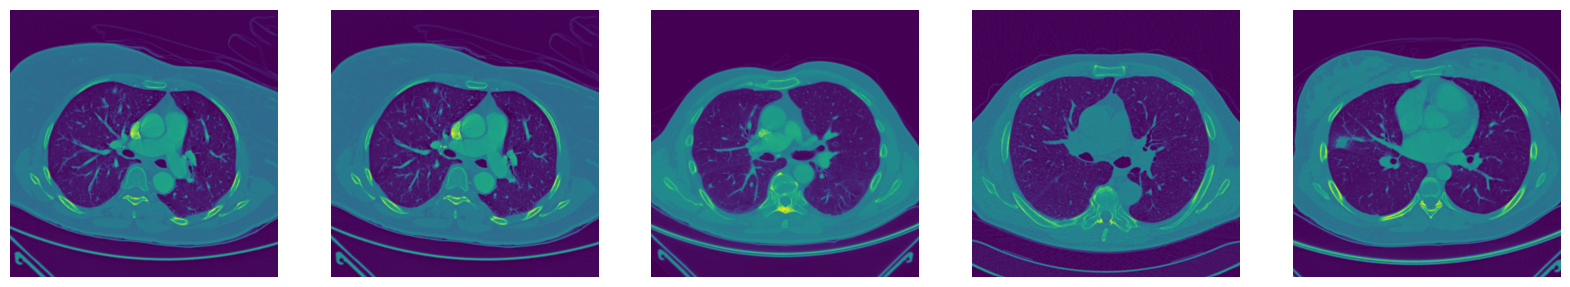

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout, Dense
import numpy as np
import os
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
from PIL import Image

# Define the path to your image dataset
dataset_path = '/content/images'

# Step 1: Load and preprocess the images with data augmentation for the training set
datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2,  # 20% of the data for validation
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

batch_size = 32
image_size = (224, 224)

train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode=None,
    shuffle=True,
    subset='training'
)

val_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode=None,
    shuffle=False,
    subset='validation'
)

# Step 2: Load the pre-trained ResNet-50 model without the top layer and add dropout layers
base_model = ResNet50(weights='imagenet', include_top=False, pooling='avg')

x = base_model.output
x = Dropout(0.5)(x)  # Add dropout layer with 50% dropout rate
model = Model(inputs=base_model.input, outputs=x)

# Step 3: Extract features for the training and validation sets
train_features = model.predict(train_generator, steps=len(train_generator), verbose=1)
val_features = model.predict(val_generator, steps=len(val_generator), verbose=1)
print(f'Training features shape: {train_features.shape}')
print(f'Validation features shape: {val_features.shape}')

# Save the features to a file for later use
np.save('train_features.npy', train_features)
np.save('val_features.npy', val_features)

# Save filenames for reference
train_filenames = train_generator.filenames
val_filenames = val_generator.filenames
np.save('train_filenames.npy', train_filenames)
np.save('val_filenames.npy', val_filenames)
print("Training and validation features and filenames saved.")

# Example: Assuming ground truth data
# For simplicity, let's create a synthetic ground truth. You need real data for actual evaluation.
# For each image, assume the ground truth is a binary value (1 for relevant, 0 for non-relevant).
# Here we are just generating random binary labels for demonstration purposes.
np.random.seed(42)  # For reproducibility
train_true_labels = np.random.randint(0, 2, size=len(train_filenames))
val_true_labels = np.random.randint(0, 2, size=len(val_filenames))

# Example: Retrieve top N images for evaluation using cosine similarity with a similarity threshold
def retrieve_top_n_images_cosine(query_feature, all_features, all_filenames, n=5, similarity_threshold=0.8):
    cosine_similarities = np.dot(all_features, query_feature) / (np.linalg.norm(all_features, axis=1) * np.linalg.norm(query_feature))
    ranked_indices = np.argsort(-cosine_similarities)  # Sort in descending order
    similar_indices = [idx for idx in ranked_indices if cosine_similarities[idx] >= similarity_threshold]
    return similar_indices[:n]

# Calculate metrics
def calculate_metrics(true_labels, predicted_labels, top_n=5):
    relevant_indices = np.argsort(predicted_labels)[-top_n:]  # Indices of the top N retrieved images
    relevant_labels = true_labels[relevant_indices]

    # For simplicity, assume binary relevance (1 for relevant, 0 for non-relevant)
    y_true = np.array([1] * len(relevant_labels) + [0] * (len(true_labels) - len(relevant_labels)))
    y_pred = np.array([1] * len(relevant_labels) + [0] * (len(true_labels) - len(relevant_labels)))

    # Calculate Precision, Recall, Accuracy, and AUC
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_pred)

    return precision, recall, accuracy, auc

# Example usage:
# Assume the first image from the validation set is the query image
query_index = 0
query_feature = val_features[query_index]

# Retrieve top 5 similar images using cosine similarity with a threshold
top_n_indices = retrieve_top_n_images_cosine(query_feature, val_features, val_filenames, n=5, similarity_threshold=0.8)

if len(top_n_indices) == 0:
    print("No similar images found.")
else:
    # Get the paths of the top N similar images
    top_n_image_paths = [os.path.join('/content/images', val_filenames[idx]) for idx in top_n_indices]

    # Visualize the top N similar images
    def visualize_images(image_paths):
        fig, axes = plt.subplots(1, len(image_paths), figsize=(20, 5))
        for ax, img_path in zip(axes, image_paths):
            img = Image.open(img_path)
            ax.imshow(img)
            ax.axis('off')
        plt.show()

    visualize_images(top_n_image_paths)


Found 1736 images belonging to 1 classes.
Found 433 images belonging to 1 classes.
14/14 [==============================] - 8s 578ms/step
Training features shape: (1736, 2048)
Validation features shape: (433, 2048)
Training and validation features and filenames saved.
Mean Precision: 0.4553
Mean Recall: 0.2763
Mean Average Precision: 0.4857
Mean NDCG: 0.4555


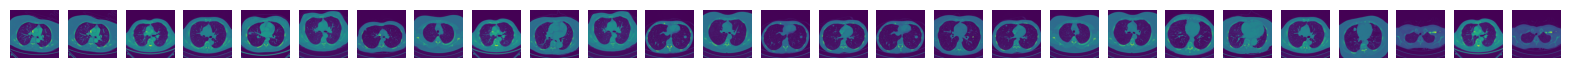

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout, Dense
import numpy as np
import os
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
import matplotlib.pyplot as plt
from PIL import Image

# Define the path to your image dataset
dataset_path = '/content/images'

# Step 1: Load and preprocess the images with data augmentation for the training set
datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2,  # 20% of the data for validation
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

batch_size = 32
image_size = (224, 224)

train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode=None,
    shuffle=True,
    subset='training'
)

val_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode=None,
    shuffle=False,
    subset='validation'
)

# Step 2: Load the pre-trained ResNet-50 model without the top layer and add dropout layers
base_model = ResNet50(weights='imagenet', include_top=False, pooling='avg')

x = base_model.output
x = Dropout(0.5)(x)  # Add dropout layer with 50% dropout rate
model = Model(inputs=base_model.input, outputs=x)

# Step 3: Extract features for the training and validation sets
train_features = model.predict(train_generator, steps=len(train_generator), verbose=1)
val_features = model.predict(val_generator, steps=len(val_generator), verbose=1)
print(f'Training features shape: {train_features.shape}')
print(f'Validation features shape: {val_features.shape}')

# Save the features to a file for later use
np.save('train_features.npy', train_features)
np.save('val_features.npy', val_features)

# Save filenames for reference
train_filenames = train_generator.filenames
val_filenames = val_generator.filenames
np.save('train_filenames.npy', train_filenames)
np.save('val_filenames.npy', val_filenames)
print("Training and validation features and filenames saved.")

# Example: Assuming ground truth data
# For simplicity, let's create a synthetic ground truth. You need real data for actual evaluation.
# For each image, assume the ground truth is a binary value (1 for relevant, 0 for non-relevant).
# Here we are just generating random binary labels for demonstration purposes.
np.random.seed(42)  # For reproducibility
train_true_labels = np.random.randint(0, 2, size=len(train_filenames))
val_true_labels = np.random.randint(0, 2, size=len(val_filenames))

# Example: Retrieve similar images using cosine similarity with a similarity threshold
def retrieve_similar_images_cosine(query_feature, all_features, all_filenames, similarity_threshold=0.8):
    cosine_similarities = np.dot(all_features, query_feature) / (np.linalg.norm(all_features, axis=1) * np.linalg.norm(query_feature))
    similar_indices = [idx for idx in np.argsort(-cosine_similarities) if cosine_similarities[idx] >= similarity_threshold]
    return similar_indices

# Calculate evaluation metrics
def calculate_metrics(true_labels, all_features, similarity_threshold=0.8):
    precision_scores = []
    recall_scores = []
    average_precisions = []
    ndcg_scores = []

    for query_idx in range(len(true_labels)):
        query_feature = all_features[query_idx]
        true_label = true_labels[query_idx]

        # Retrieve similar images
        similar_indices = retrieve_similar_images_cosine(query_feature, all_features, None, similarity_threshold)

        if len(similar_indices) == 0:
            continue

        # True labels of the retrieved images
        retrieved_labels = true_labels[similar_indices]

        # Precision at K
        precision_at_k = np.sum(retrieved_labels) / len(retrieved_labels)
        precision_scores.append(precision_at_k)

        # Recall at K
        recall_at_k = np.sum(retrieved_labels) / np.sum(true_labels)
        recall_scores.append(recall_at_k)

        # Average Precision at K
        ap = 0.0
        num_relevant = 0
        for i, rel in enumerate(retrieved_labels):
            if rel:
                num_relevant += 1
                ap += num_relevant / (i + 1)
        ap /= np.sum(retrieved_labels)
        average_precisions.append(ap)

        # NDCG at K
        dcg = 0.0
        idcg = 0.0
        for i, rel in enumerate(retrieved_labels):
            dcg += rel / np.log2(i + 2)
            idcg += 1 / np.log2(i + 2)
        ndcg = dcg / idcg
        ndcg_scores.append(ndcg)

    mean_precision = np.mean(precision_scores)
    mean_recall = np.mean(recall_scores)
    mean_ap = np.mean(average_precisions)
    mean_ndcg = np.mean(ndcg_scores)

    return mean_precision, mean_recall, mean_ap, mean_ndcg

# Example usage:
# Evaluate on the validation set
mean_precision, mean_recall, mean_ap, mean_ndcg = calculate_metrics(val_true_labels, val_features, similarity_threshold=0.8)

print(f'Mean Precision: {mean_precision:.4f}')
print(f'Mean Recall: {mean_recall:.4f}')
print(f'Mean Average Precision: {mean_ap:.4f}')
print(f'Mean NDCG: {mean_ndcg:.4f}')

# Visualize the similar images
def visualize_images(image_paths):
    fig, axes = plt.subplots(1, len(image_paths), figsize=(20, 5))
    for ax, img_path in zip(axes, image_paths):
        img = Image.open(img_path)
        ax.imshow(img)
        ax.axis('off')
    plt.show()

# Example usage: Visualize the similar images for the first query image in the validation set
query_index = 0
query_feature = val_features[query_index]
similar_indices = retrieve_similar_images_cosine(query_feature, val_features, val_filenames, similarity_threshold=0.8)

if len(similar_indices) == 0:
    print("No similar images found.")
else:
    similar_image_paths = [os.path.join('/content/images', val_filenames[idx]) for idx in similar_indices]
    visualize_images(similar_image_paths)


Found 1736 images belonging to 1 classes.
Found 433 images belonging to 1 classes.
14/14 [==============================] - 10s 719ms/step
Training features shape: (1736, 2048)
Validation features shape: (433, 2048)
Training and validation features and filenames saved.


<ipython-input-12-2b1e5eacbf9d>:113: RuntimeWarning: invalid value encountered in divide
  ap /= np.sum(retrieved_labels)
<ipython-input-12-2b1e5eacbf9d>:113: RuntimeWarning: invalid value encountered in divide
  ap /= np.sum(retrieved_labels)
<ipython-input-12-2b1e5eacbf9d>:113: RuntimeWarning: invalid value encountered in divide
  ap /= np.sum(retrieved_labels)
<ipython-input-12-2b1e5eacbf9d>:113: RuntimeWarning: invalid value encountered in divide
  ap /= np.sum(retrieved_labels)
<ipython-input-12-2b1e5eacbf9d>:113: RuntimeWarning: invalid value encountered in divide
  ap /= np.sum(retrieved_labels)
<ipython-input-12-2b1e5eacbf9d>:113: RuntimeWarning: invalid value encountered in divide
  ap /= np.sum(retrieved_labels)
<ipython-input-12-2b1e5eacbf9d>:113: RuntimeWarning: invalid value encountered in divide
  ap /= np.sum(retrieved_labels)
<ipython-input-12-2b1e5eacbf9d>:113: RuntimeWarning: invalid value encountered in divide
  ap /= np.sum(retrieved_labels)
<ipython-input-12-2b1e5e

Mean Average Precision (mAP): nan
Mean AUC: 0.5000


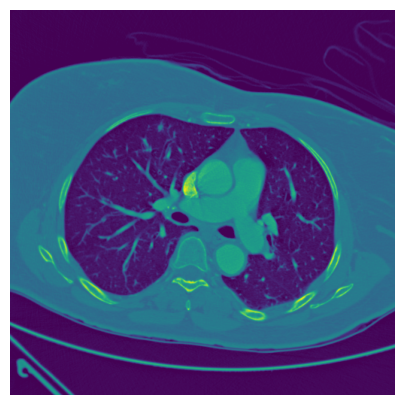

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout
import numpy as np
import os
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from PIL import Image

# Define the path to your image dataset
dataset_path = '/content/images'

# Step 1: Load and preprocess the images with data augmentation for the training set
datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2,  # 20% of the data for validation
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

batch_size = 32
image_size = (224, 224)

train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode=None,
    shuffle=True,
    subset='training'
)

val_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode=None,
    shuffle=False,
    subset='validation'
)

# Step 2: Load the pre-trained ResNet-50 model without the top layer and add dropout layers
base_model = ResNet50(weights='imagenet', include_top=False, pooling='avg')

x = base_model.output
x = Dropout(0.5)(x)  # Add dropout layer with 50% dropout rate
model = Model(inputs=base_model.input, outputs=x)

# Step 3: Extract features for the training and validation sets
train_features = model.predict(train_generator, steps=len(train_generator), verbose=1)
val_features = model.predict(val_generator, steps=len(val_generator), verbose=1)
print(f'Training features shape: {train_features.shape}')
print(f'Validation features shape: {val_features.shape}')

# Save the features to a file for later use
np.save('train_features.npy', train_features)
np.save('val_features.npy', val_features)

# Save filenames for reference
train_filenames = train_generator.filenames
val_filenames = val_generator.filenames
np.save('train_filenames.npy', train_filenames)
np.save('val_filenames.npy', val_filenames)
print("Training and validation features and filenames saved.")

# Example: Assuming ground truth data
# For simplicity, let's create a synthetic ground truth. You need real data for actual evaluation.
# For each image, assume the ground truth is a binary value (1 for relevant, 0 for non-relevant).
# Here we are just generating random binary labels for demonstration purposes.
np.random.seed(42)  # For reproducibility
train_true_labels = np.random.randint(0, 2, size=len(train_filenames))
val_true_labels = np.random.randint(0, 2, size=len(val_filenames))

# Example: Retrieve similar images using Euclidean distance with a similarity threshold
def retrieve_similar_images_euclidean(query_feature, all_features, all_filenames, distance_threshold=0.8):
    distances = np.linalg.norm(all_features - query_feature, axis=1)
    similar_indices = [idx for idx in np.argsort(distances) if distances[idx] <= distance_threshold]
    return similar_indices

# Calculate evaluation metrics
def calculate_metrics(true_labels, all_features, distance_threshold=0.8):
    average_precisions = []
    auc_scores = []

    for query_idx in range(len(true_labels)):
        query_feature = all_features[query_idx]
        true_label = true_labels[query_idx]

        # Retrieve similar images
        similar_indices = retrieve_similar_images_euclidean(query_feature, all_features, None, distance_threshold)

        if len(similar_indices) == 0:
            continue

        # True labels of the retrieved images
        retrieved_labels = true_labels[similar_indices]

        # Average Precision at K
        ap = 0.0
        num_relevant = 0
        for i, rel in enumerate(retrieved_labels):
            if rel:
                num_relevant += 1
                ap += num_relevant / (i + 1)
        ap /= np.sum(retrieved_labels)
        average_precisions.append(ap)

        # AUC Score
        y_true = true_labels
        y_scores = np.zeros(len(true_labels))
        y_scores[similar_indices] = 1  # Scores for the retrieved images
        auc = roc_auc_score(y_true, y_scores)
        auc_scores.append(auc)

    mean_ap = np.mean(average_precisions)
    mean_auc = np.mean(auc_scores)

    return mean_ap, mean_auc

# Example usage:
# Evaluate on the validation set
mean_ap, mean_auc = calculate_metrics(val_true_labels, val_features, distance_threshold=0.8)

print(f'Mean Average Precision (mAP): {mean_ap:.4f}')
print(f'Mean AUC: {mean_auc:.4f}')

# Visualize the similar images
def visualize_images(image_paths):
    if len(image_paths) == 1:
        fig, ax = plt.subplots(figsize=(20, 5)) # Handle single image case
        img = Image.open(image_paths[0])
        ax.imshow(img)
        ax.axis('off')
    else:
        fig, axes = plt.subplots(1, len(image_paths), figsize=(20, 5))
        for ax, img_path in zip(axes, image_paths):
            img = Image.open(img_path)
            ax.imshow(img)
            ax.axis('off')
    plt.show()

# Example usage: Visualize the similar images for the first query image in the validation set
query_index = 0
query_feature = val_features[query_index]
similar_indices = retrieve_similar_images_euclidean(query_feature, val_features, val_filenames, distance_threshold=0.8)

if len(similar_indices) == 0:
    print("No similar images found.")
else:
    similar_image_paths = [os.path.join('/content/images', val_filenames[idx]) for idx in similar_indices]
    visualize_images(similar_image_paths)
